In [ ]:
%pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from backtesterClass.orderClass import orders
from backtesterClass.orderBookClass import OBData
from backtesterClass.analysisClass import analysisClass


from strats.valueStrat import valueStrat

from utils.utils import global_perf, peformance_metrics

from cProfile import Profile
from pstats import SortKey, Stats
import gc
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Improve computationnal performance of the backtester - increases garbage collector threshold

allocs, gen1, gen2 = gc.get_threshold()
allocs = 5000
gen1 = gen1*2
gen2=gen2*2
gc.set_threshold(allocs, gen1,gen2)

## Load and Initialize data

In [2]:
db_path = r"data/all_ohlcv_data.csv"
dataClass = OBData(db_path)

## Value Strategy

•⁠  Value strategy:
  - Value 1: 

In [3]:
valueTrader = valueStrat("valueTrader", dataClass.assets, "2005-05-05", "2025-05-05", 10)

/Users/elyazidbenkhadra/Desktop/LAST-AMP/AMP-Algo-Trading/strats/valueStrat.py:43: DtypeWarning: Columns (12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,288,300,312,324,336,348,360,372,384,396,408,420,432,444,456,468,480,492,504,516,528,540,552,564,576,588,600,612,624,636,648,660,672,684,696,708,720,732,744,756,768,780,792,804,816,828,840,852,864,876,888,900,912,924,936,948,960,972,984,996,1008,1020,1044,1056,1068,1080,1092,1104,1116,1128,1140,1152,1164,1176,1188,1200,1212,1224,1236,1248,1260,1272,1284,1296,1308,1320) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wide = pd.read_csv(CSV_PATH, header=[0,1], index_col=0, parse_dates=True)
/Users/elyazidbenkhadra/Desktop/LAST-AMP/AMP-Algo-Trading/strats/valueStrat.py:58: DtypeWarning: Columns (12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,288,300,312,324,336,348,360,372,384,396,408,420,432,444,456,468,480,492,504,516,528,540,552,564,

## Backtesting 

In [4]:
for _ in tqdm(range(len(dataClass.OBData_))):
    orderClass = orders()
    valueTrader.strategy(orderClass)
    OBData.step +=1 

100%|██████████| 5031/5031 [00:00<00:00, 6317.80it/s]


## Single Stock and Global Analysis - Value

In [5]:
analysisValue = analysisClass(valueTrader, path=r"Results", dashboardName="executionValueStrat", dbName="dbValueStrat")
analysisValue.create_dashboard("OXY", show=True)

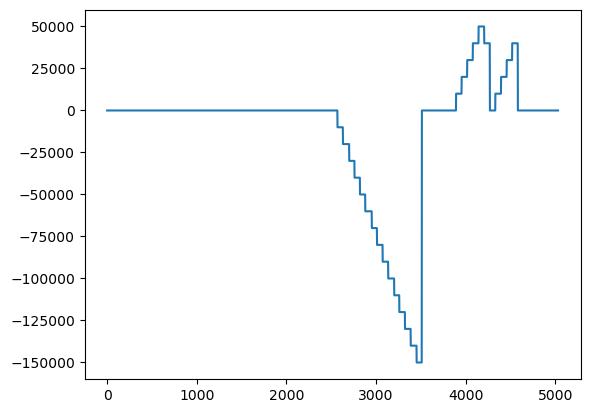

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(valueTrader.historical_inventory)[:,OBData.assetIdx["OXY"]-1])
plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np

# Extract PnL series for asset "OXY"
oxy_idx = OBData.assetIdx["OXY"] - 1
oxy_pnl = np.array(valueTrader.historical_pnl_per_asset)[:, oxy_idx]

# Create Plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=analysisValue.data.Date,y=oxy_pnl, mode='lines', name='OXY PnL'))

# Update layout (optional)
fig.update_layout(
    title='Historical PnL for OXY',
    xaxis_title='Time Step',
    yaxis_title='PnL',
    template='plotly_white'
)

fig.show()


In [8]:
# Strategy instances
strategies = {
    "valueTrader": valueTrader,

}

global_perf(strategies, "Value")

peformance_metrics(strategies)


,Strategy,Avg PnL/Asset ($),Avg Variance/Asset,Sharpe Ratio (annualized),Max Drawdown (%),Annualized Return (%)
0,valueTrader,326888.458026,2.712141e+12,0.320248,-36.931231,2.718122
